In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
# load dataset
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


### Train PCA model

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
z = pca.fit_transform(X_train_flat)

### plot output

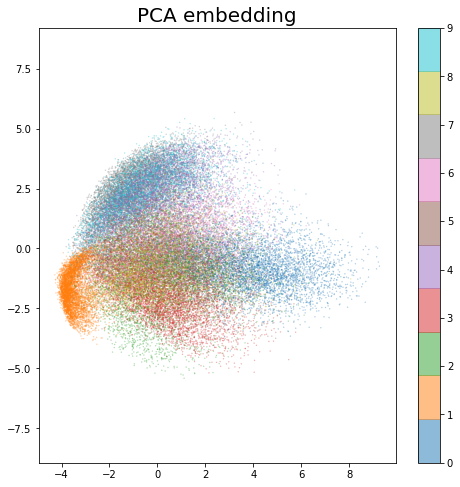

In [11]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save model

In [12]:
import os
import pickle

In [13]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [14]:
output_dir = MODEL_DIR/'projections'/ 'mnist' / 'PCA'
ensure_dir(output_dir)

In [15]:
with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

In [17]:
np.save(output_dir / 'z.npy', z)

## tsne

In [18]:
from openTSNE import TSNE

In [20]:
tsne = TSNE(
    n_components = 2
)

In [22]:
embedding_train = tsne.fit(X_train_flat)

In [30]:
z = np.array(embedding_train)

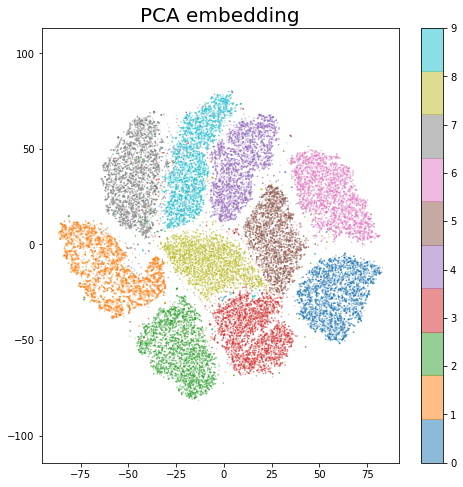

In [31]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("PCA embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

#### save model

In [33]:
import os
import pickle

from tfumap.paths import ensure_dir, MODEL_DIR

output_dir = MODEL_DIR/'projections'/ 'mnist'/  'TSNE'
ensure_dir(output_dir)

with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(pca, output, pickle.HIGHEST_PROTOCOL)

np.save(output_dir / 'z.npy', z)